In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
df = pd.read_json('../Data2.json')
df.sort_index(inplace=True)

In [72]:
# Change type==Unknown to N/A
df['fundType'].replace('Unknown','n/a',inplace=True)
df['fundType'].value_counts()

n/a      1946
RA        557
Award     442
TA/RA     347
TA        234
Name: fundType, dtype: int64

## Fund situation for all students

** n/a = Could be records with no fund & also records with fund but with no specified type**

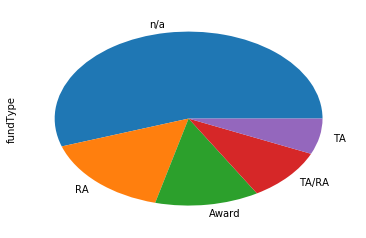

In [73]:
df['fundType'].value_counts().plot(kind='pie')
plt.show()

#### Merge TA and RA to RA/TA

In [74]:
df['fundType'].replace(['RA','TA'],'TA/RA',inplace=True)
df['fundType'].value_counts()

n/a      1946
TA/RA    1138
Award     442
Name: fundType, dtype: int64

## Overall status 

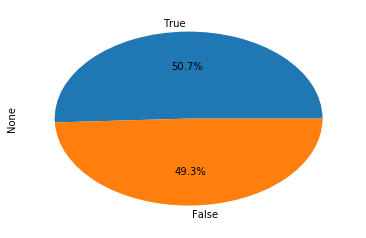

In [75]:
((df['fund']>0)|(df['fundType']!='n/a')).value_counts().plot(autopct='%1.1f%%',kind='pie')
plt.show()

** We assume 49% of students didn't get any fund or scholarship.**

### Type of funds (for those who gets fund)

In [76]:
df[df['fund']>0]['fundType'].value_counts()

TA/RA    1138
Award     442
n/a       208
Name: fundType, dtype: int64

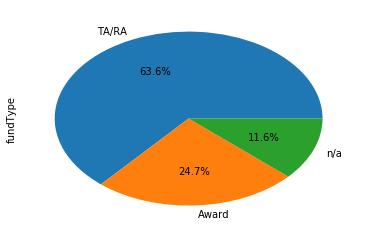

In [77]:
df[df['fund']>0]['fundType'].value_counts().plot(autopct='%1.1f%%',kind='pie')
plt.show()

#### About 63% student get fund from being Prof Assistance.

## Grouping FUNDs with Bins

In [78]:
df[df['fund']==0].count()[1]

1738

In [79]:
df[(df['fund']==0) & (df['fundType']!='n/a')]

,accUni,apDegree,apUni,bachelorsAvg,bachelorsUni,country,engExamAnlt,engExamQuan,engExamResult,engExamType,...,extra,field,fund,fundType,masterAvg,masterUni,papersGLOB,papersIRAN,rejUni,year


** so 1738 of our records did not get any fund **

In [80]:
df['fund']=df['fund'].apply(pd.to_numeric, errors='coerce').dropna()
myBins=np.array([df['fund'].min(),1000,2000,3000,4000,5000,10000,25000,50000,100000,df['fund'].max()])
z=pd.cut(df['fund'], myBins)
z.value_counts()

(10000, 25000]      863
(25000, 50000]      657
(50000, 100000]      96
(5000, 10000]        66
(2000, 3000]         36
(0, 1000]            30
(4000, 5000]         14
(100000, 800000]      9
(3000, 4000]          9
(1000, 2000]          8
Name: fund, dtype: int64

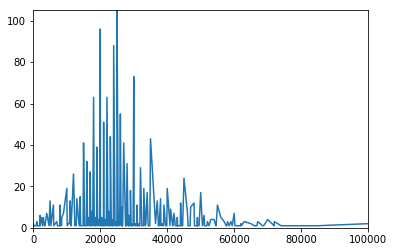

In [81]:
count=df['fund'].value_counts().sort_index()
count=count[count.index!=0]
p=count.plot()
p.set_ylim(0,count.max())
p.set_xlim(0,100000)
plt.show()

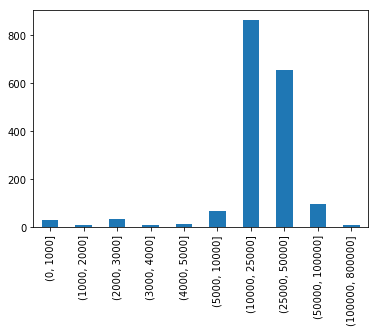

In [82]:
z.value_counts().sort_index().plot(kind='bar')
plt.show()

In [83]:
df.rename(columns={'fund': 'fundValue'}, inplace=True)

In [84]:
df.fundValue.count()

3526

In [85]:
df['fund']=df['fundValue']>0

In [86]:
df[['fund','fundValue','fundType']].head()

,fund,fundValue,fundType
2,True,12600,Award
3,True,63000,TA/RA
5,True,59400,TA/RA
6,False,0,n/a
7,True,24500,TA/RA


## Saving data

In [87]:
df.to_json('Data_FixedFound.json',date_format='utf8')